In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = pd.read_csv('75r_tsetserleg.csv')

data['Datetime'] = pd.to_datetime(data['Datetime'])

data['Week_days'] = data['Datetime'].dt.dayofweek

In [156]:
data['Week_days_name'] = data['Datetime'].dt.day_name()

new_data = data.groupby([data['Datetime'].dt.hour, 'Week_days_name']).median()
new_data['Week_days'] = new_data['Week_days']+1
new_data['Week_days'][new_data['Week_days']==7] = 0

new_data = new_data.sort_values(by=['Week_days', 'Datetime'])
new_data = new_data.reset_index()

In [158]:
weekdays = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

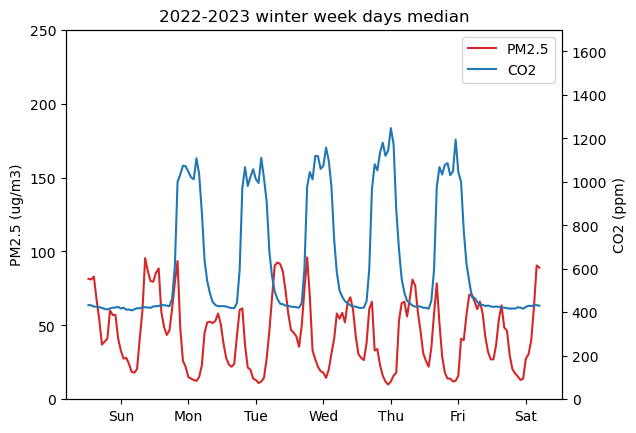

In [163]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ln1 = ax1.plot(new_data['PM2.5 (ug/m3)'], color=color, label='PM2.5')
ax1.set_ylabel('PM2.5 (ug/m3)')
ax1.set_ylim([0, 250])
ax2 = ax1.twinx()  
ax2.set_ylim([0, 1700])
ln2 = ax2.plot(new_data['CO2 (ppm)'], label='CO2')
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
ax2.set_ylabel('CO2 (ppm)')
plt.xticks(np.arange(12, 187, step=25), weekdays)  # Set text labels.
plt.title('2022-2023 winter week days median')
plt.show()